<a href="https://colab.research.google.com/github/rushirajsherlocked/FastAi-Projects/blob/master/Image_Similarity_Caltech_101_and_256_Objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
!pip install lshash

In [7]:
cd /content/gdrive/My\ Drive/Torrent/Caltech101/

/content/gdrive/My Drive/Torrent/Caltech101


In [12]:
!tar xzf /content/gdrive/My\ Drive/Torrent/Caltech101/101_ObjectCategories.tar.gz

In [3]:
import pandas as pd
import pickle
import numpy as np 
from fastai.vision import *
from fastai.callbacks.hooks import *
import matplotlib.pyplot as plt 
#from lshash import LSHash
from PIL import Image
from tqdm import tqdm_notebook
pd.set_option('display.max_columns', 500)

In [14]:
path = Path('/content/gdrive/My Drive/Torrent/Caltech101/')


In [ ]:
!pip install LocalitySensitiveHashing
!pip install BitVector
from LocalitySensitiveHashing import *

datafile = "data_for_lsh.csv"

lsh = LocalitySensitiveHashing(
                   datafile = datafile,
                   dim = 10,
                   r = 50,
                   b = 100,
                   expected_num_of_clusters = 10,
          )

     |████████████████████████████████| 71kB 1.9MB/s 
  Created wheel for LocalitySensitiveHashing: filename=LocalitySensitiveHashing-1.0.1-cp36-none-any.whl size=21905 sha256=0a334e8ca4f6613c3e6f1f91d72c5ed79e15bd09ca655b0e788c1fd569d87b5c
  Stored in directory: /root/.cache/pip/wheels/63/8b/25/5fca539d61443cdc7506d849e685aa3e5fa2d43f40d8515a65
Successfully built LocalitySensitiveHashing
     |████████████████████████████████| 133kB 2.9MB/s 
  Created wheel for BitVector: filename=BitVector-3.4.9-cp36-none-any.whl size=43301 sha256=5972be53579cf6d11dd4802c1341a9dfb10de70f66a6344db5152ac485ce8021
  Stored in directory: /root/.cache/pip/wheels/75/a0/12/73dcb6e70a9d650ac2253472497f78ac874709a7c39a415f1a
Successfully built BitVector


In [17]:
tfms = get_transforms(
    do_flip=False, 
    flip_vert=False, 
    max_rotate=0, 
    max_lighting=0, 
    max_zoom=1, 
    max_warp=0
)
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .transform(tfms=tfms, size=224)
        .databunch(bs=32))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [18]:
print('Number of classes {0}'.format(data.c))
print(data.classes)

Number of classes 102
['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'se

In [19]:
print('Train dataset size: {0}'.format(len(data.train_ds.x)))
print('Test dataset size: {0}'.format(len(data.valid_ds.x)))

Train dataset size: 7316
Test dataset size: 1828


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


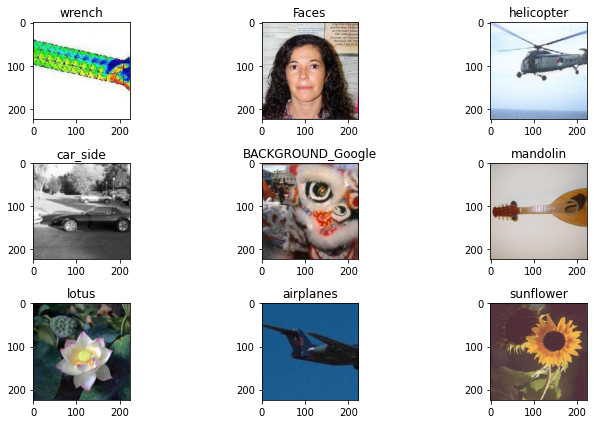

In [20]:
## Show sample data
data.show_batch(rows=3, figsize=(10,6), hide_axis=False)

# Create the model

In [21]:
learn = cnn_learner(data,models.resnet34,pretrained = True,metrics = accuracy)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [25]:
learn.model         # IMPORTANT !!!

# BECAUSE later on we will extract the weights from the second last layer so it is imp to know
# which layer is the last ( RELU outcome) see (5) 

# learn.model[1][5]

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


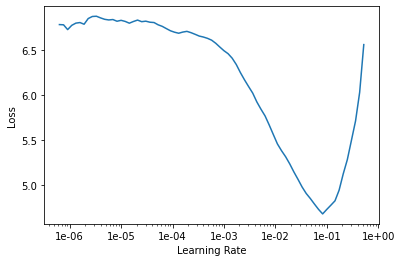

In [27]:
## Finding Ideal learning late

warnings.filterwarnings("ignore")
warnings.warn("this will not show", DeprecationWarning)

learn.lr_find()
learn.recorder.plot()

In [28]:
warnings.filterwarnings("ignore")
warnings.warn("this will not show", DeprecationWarning)

learn.fit_one_cycle(5,1e-2) 



epoch,train_loss,valid_loss,accuracy,time
0,1.237238,1.085514,0.730306,01:42
1,1.353025,0.814082,0.783370,01:41
2,0.815423,0.454668,0.875274,01:40
3,0.445836,0.321944,0.917943,01:40
4,0.223397,0.268614,0.928884,01:40


In [29]:
learn.save('caltech-101-stage-1-rn34')

In [30]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


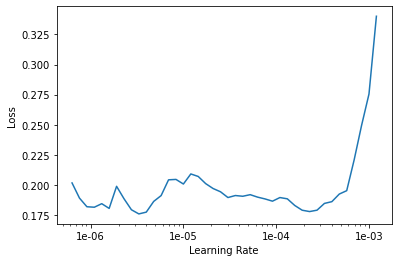

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
# Reference : http://www.easysurf.cc/scintd.htm

learn.fit_one_cycle(5,max_lr = slice(1e-6, 1e-5/2)) 


epoch,train_loss,valid_loss,accuracy,time
0,0.172831,0.272669,0.932166,01:47
1,0.189758,0.268080,0.929978,01:47
2,0.183693,0.262993,0.930525,01:47
3,0.177323,0.257214,0.932166,01:47
4,0.157218,0.259465,0.932166,01:47


In [33]:
learn.save('caltech-101-stage-2-rn34')

# Transferring model to Caltech-256 Dataset

In [34]:
path = Path('/content/gdrive/My Drive/Torrent/Caltech-256-Classification/256_ObjectCategories')


In [35]:
tfms2 = get_transforms(
    do_flip=False, 
    flip_vert=False, 
    max_rotate=0, 
    max_lighting=0, 
    max_zoom=1, 
    max_warp=0
)
data2 = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .transform(tfms=tfms, size=224)
        .databunch(bs=32))

In [36]:
print('Number of classes {0}'.format(data2.c))
print(data2.classes)

print('Train dataset size: {0}'.format(len(data2.train_ds.x)))
print('Test dataset size: {0}'.format(len(data2.valid_ds.x)))

Number of classes 257
['001.ak47', '002.american-flag', '003.backpack', '004.baseball-bat', '005.baseball-glove', '006.basketball-hoop', '007.bat', '008.bathtub', '009.bear', '010.beer-mug', '011.billiards', '012.binoculars', '013.birdbath', '014.blimp', '015.bonsai-101', '016.boom-box', '017.bowling-ball', '018.bowling-pin', '019.boxing-glove', '020.brain-101', '021.breadmaker', '022.buddha-101', '023.bulldozer', '024.butterfly', '025.cactus', '026.cake', '027.calculator', '028.camel', '029.cannon', '030.canoe', '031.car-tire', '032.cartman', '033.cd', '034.centipede', '035.cereal-box', '036.chandelier-101', '037.chess-board', '038.chimp', '039.chopsticks', '040.cockroach', '041.coffee-mug', '042.coffin', '043.coin', '044.comet', '045.computer-keyboard', '046.computer-monitor', '047.computer-mouse', '048.conch', '049.cormorant', '050.covered-wagon', '051.cowboy-hat', '052.crab-101', '053.desk-globe', '054.diamond-ring', '055.dice', '056.dog', '057.dolphin-101', '058.doorknob', '059.dr

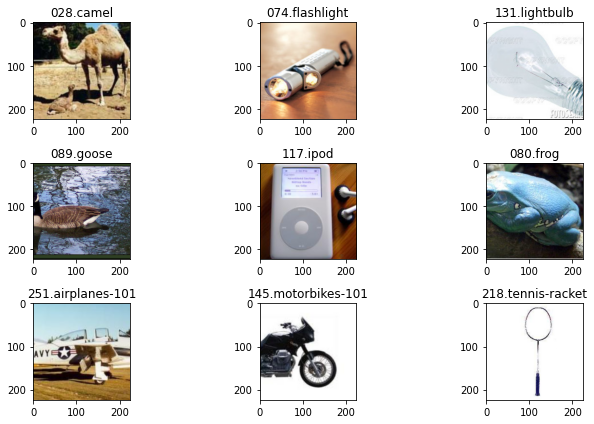

In [37]:
## Show sample data
data2.show_batch(rows=3, figsize=(10,6), hide_axis=False)

## V.IMP ! Load model trained on less number of classes to new dataset containing more number of classes

In [48]:
## V.IMP !! How to load model of different classes into higher number of classes

# Reference : https://forums.fast.ai/t/loading-model-with-different-classes/51689

learn2 = cnn_learner(data2,models.resnet34,pretrained=True, metrics = accuracy).load('/content/gdrive/My Drive/Torrent/Caltech101/models/caltech-101-stage-2-rn34',strict = False, remove_module = True)



epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


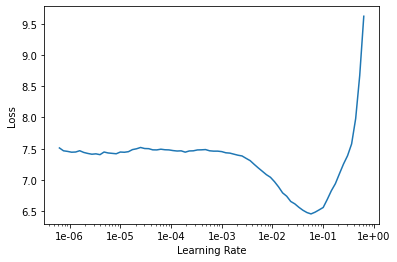

In [49]:
learn2.lr_find()
learn2.recorder.plot()

In [50]:
learn2.fit_one_cycle(3,max_lr = slice(1e-02, 1e-01) ) 

epoch,train_loss,valid_loss,accuracy,time
0,10.984254,9.868994,0.039373,1:16:03
1,6.154050,136.183777,0.110766,07:04
2,3.851022,166.739471,0.262702,07:03


In [51]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


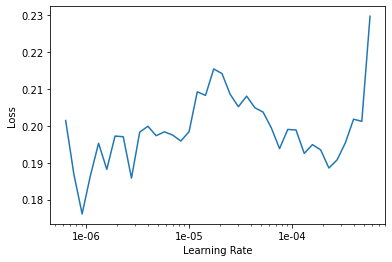

In [52]:
learn.lr_find()
learn.recorder.plot()

In [53]:
learn.fit_one_cycle(5, max_lr = slice(1.5e-6, 1e-6) )

epoch,train_loss,valid_loss,accuracy,time
0,0.152648,0.258871,0.931619,01:47
1,0.154976,0.256547,0.933260,01:47
2,0.157330,0.257785,0.935449,01:49
3,0.155536,0.262676,0.928884,01:48
4,0.155511,0.254720,0.934902,01:49


In [54]:
learn.save('caltech-256-stage1-rn34-transferred')

In [55]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


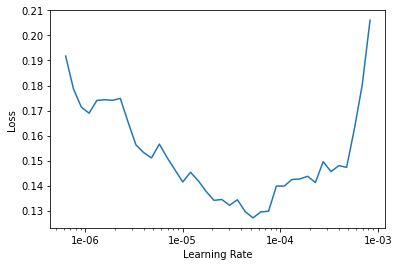

In [56]:
learn.lr_find()
learn.recorder.plot()

In [57]:
learn.fit_one_cycle(5, max_lr = slice(5e-5, 8e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.181320,0.276830,0.925055,01:47
1,0.228035,0.262828,0.928337,01:48
2,0.150315,0.258485,0.927243,01:47
3,0.080742,0.209181,0.942560,01:48
4,0.055901,0.207322,0.945295,01:48


In [58]:
learn.save('caltech-256-stage2-rn34-transferred')

In [60]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


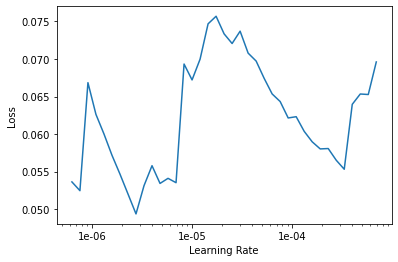

In [61]:
learn.lr_find()
learn.recorder.plot()

In [63]:
learn.fit_one_cycle(5,max_lr = slice(1.5e-6, 6e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.047380,0.196085,0.944201,01:48
1,0.038286,0.198696,0.941466,01:47
2,0.034892,0.198343,0.943654,01:47
3,0.035610,0.199577,0.943107,01:47
4,0.035617,0.197309,0.948031,01:47


# After Training model with 94.5 % accuracy, lets Extract features

## Extract Features

In [64]:
# this is a hook (learned about it here: https://forums.fast.ai/t/how-to-find-similar-images-based-on-final-embedding-layer/16903/13)
# hooks are used for saving intermediate computations
class SaveFeatures():
    features=None
    def __init__(self, m): 
        self.hook = m.register_forward_hook(self.hook_fn)
        self.features = None
    def hook_fn(self, module, input, output): 
        out = output.detach().cpu().numpy()
        if isinstance(self.features, type(None)):
            self.features = out
        else:
            self.features = np.row_stack((self.features, out))
    def remove(self): 
        self.hook.remove()
        
sf = SaveFeatures(learn.model[1][5]) ## Output before the last FC layer

### Creating feature vector

In [66]:
## By running this feature vectors would be saved in sf variable initated above
_= learn.get_preds(data2.train_ds)
_= learn.get_preds(DatasetType.Valid)

### Converting in a dictionary of {img_path:featurevector}

In [70]:
img_path = [str(x) for x in (list(data2.train_ds.items)+list(data2.valid_ds.items))]
feature_dict = dict(zip(img_path,sf.features))

In [5]:
path = Path('/content/gdrive/My Drive/Torrent/Caltech-256-Classification/')

In [75]:
## Exporting as pickle
pickle.dump(feature_dict, open(path/"feature_dict.p", "wb"))

# Using Locality Sensitive hashing to find near similar images¶


In [76]:
## Loading Feature dictionary
feature_dict = pickle.load(open('/content/gdrive/My Drive/Torrent/Caltech-256-Classification/feature_dict.p','rb'))

In [95]:
!pip install lshashpy3

  Created wheel for lshashpy3: filename=lshashpy3-0.0.8-cp36-none-any.whl size=8877 sha256=847dff2926c501b56d3164fa156e1a5d2ffe989e0be6d93595a08e7dd9ed934d
  Stored in directory: /root/.cache/pip/wheels/c6/81/29/a48985e27d56ddea4e601fda82b9be9962d20801b3cfa82c2d
Successfully built lshashpy3


In [101]:
## Locality Sensitive Hashing

from lshashpy3 import *

# params
k = 10 # hash size
L = 5  # number of tables
d = 512 # Dimension of Feature vector
lsh = LSHash(hash_size=k, input_dim=d, num_hashtables=L)

# LSH on all the images
for img_path, vec in tqdm_notebook(feature_dict.items()):
    lsh.index(vec.flatten(), extra_data=img_path)

In [105]:
## Exporting as pickle
pickle.dump(lsh, open(path/'lsh.p', "wb"))

# Visualising Output

In [6]:
## Loading Feature dictionary
feature_dict = pickle.load(open(path/'feature_dict.p','rb'))
lsh = pickle.load(open(path/'lsh.p','rb'))

def get_similar_item(idx, feature_dict, lsh_variable, n_items=5):
    response = lsh_variable.query(feature_dict[list(feature_dict.keys())[idx]].flatten(), 
                     num_results=n_items+1, distance_func='hamming')
    
    columns = 3
    rows = int(np.ceil(n_items+1/columns))
    fig=plt.figure(figsize=(2*rows, 3*rows))
    for i in range(1, columns*rows +1):
        if i<n_items+2:
            img = Image.open(response[i-1][0][1])
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
    return plt.show()

In [110]:
!pip install BitVector

In [143]:
!pip install bitarray
!pip install bitarray-ph4

     |████████████████████████████████| 71kB 2.0MB/s 
  Created wheel for bitarray-ph4: filename=bitarray_ph4-1.2.3-cp36-cp36m-linux_x86_64.whl size=127225 sha256=2626f2cb183546cf459c177dceabc08962b68c8625265f6b6f59517d3e7ce3d6
  Stored in directory: /root/.cache/pip/wheels/30/c2/b1/2edd4858c9466be3e273bf396bfd754053d932269643dbe978
Successfully built bitarray-ph4


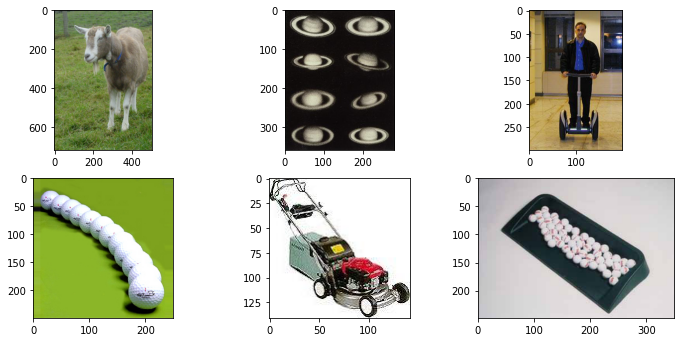

In [131]:
from bitarray import bitarray
get_similar_item(0, feature_dict, lsh,5)

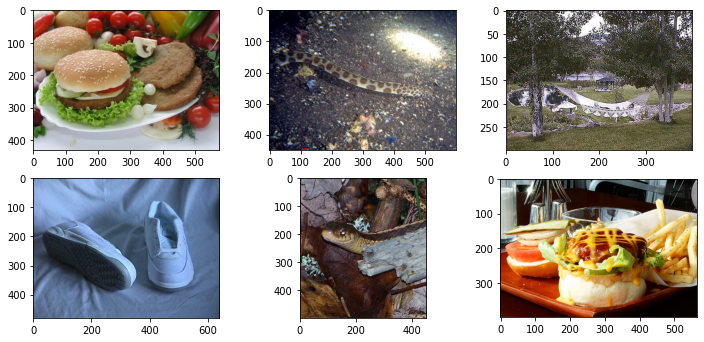

In [7]:
from bitarray import bitarray
get_similar_item(1000, feature_dict, lsh,5)


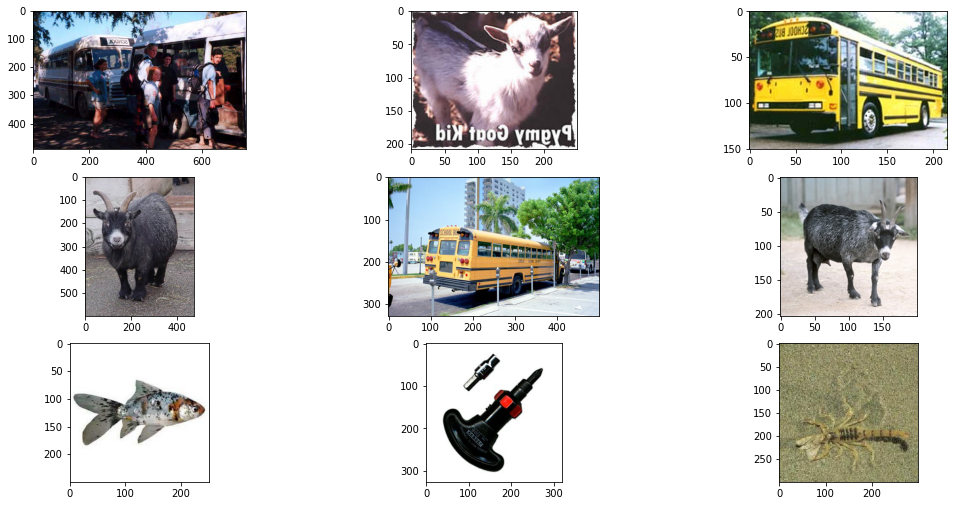

In [8]:
get_similar_item(34, feature_dict, lsh, 8)


# Trying the same thing for CALTECH-10 dataset